# **Sistema de Controle em Malha Fechada**

<p align = 'justify' > O diagrama de blocos abaixo, ilustra o esquema básico de sistemas de controle em malha fechada com realimentação negativa. No esquema, destaca-se $4$ sinais principais:  o sinal de referência, o sinal de erro de controle, o sinal de controle e o sinal de saída. </p>

Tem-se também, dois sistema em destaque, o **processo**, representando a dinâmica a ser controlada e o **controlador**. </p>

# **Projeto Controlador Proporcional**

Considera-se a Função de Transferência de Malha Aberta ("Processo") do sistema Motor-Gerador sendo de primeira ordem: 

$$ G(s) = \frac{K_m}{\tau s + 1} \tag{1}$$


Admita que $G_c(s)$ representa a função de transferência do controlador. Em malha fechada, representado por, $H(s)$, é 

$$ H(s) = \frac{G_c(s) G(s)}{1 + G_c(s) G(s)} \tag{2}$$

Considerando $G_c(s) = K_p$, a Função de Transferência de Malha Fechada, com controlador proporcional, é:

$$ H(s) = \frac{K_p G(s)}{1 + K_p G(s)} \tag{3}$$


Substituindo $G(s)$ em $H(s)$, ou seja, (1) em (2): 
$$ H(s) = \frac{ \frac{K_p K_m}{1 + K_p K_m} }{ \frac{\tau}{1 + K_p K_m}s +1 } \tag{4}$$

Observa-se que, tanto o ganho quanto a constante de tempo do sistema em malha fechada são funções do ganho proporcional do controlador. Isso permite projetar o ganho do controlador ($K_p$) de tal forma que o sistema em MF responda a fim de atender critérios de desempenho especificados. 



[A biblioteca em python de sistemas de controle pode ser acessa aqui!](https://python-control.readthedocs.io/en/latest/intro.html)

Por exemplo, é possível projetar o ganho do controlador ($K_p$) com o objetivo de tornar a resposta do sistema em MF "mais" rápida. No entanto, considere as seguintes observações:

1. Resposta mais rápida, implica que a constante de tempo do sistema em MF deve ser menor do que a constante de tempo em MA. O quanto menor ?

2. O $K_p$ também altera o ganho DC do sistema em MF. 

3. O controlador proporcional não altera o tipo do sistema. Se o sistema em MA for do tipo $0$, o sistema em malha fechada com  controlador proporcional permanence sendo do tipo ZERO. Explique.

4. O erro em regime permanente para sistema do Tipo $0$, com controlador proporcional, é não nulo. Explique. 


Para fins de simulação, vamos considerar os seguintes parâmetros para o sistema em MA: $K_m = 0.2$ e $\tau = 0.3$.

Desse forma, vamos adotar como especificações de desempenho de MF, os seguites critérios:

1. Constante de tempo de MF ser $70\%$ da constante de malha aberta.  $$\tau_{MF} = 0,7 \tau $$

Substituindo em $(4)$, tem-se: 

$$ \frac{7}{10} = \frac{1}{1 + K_p K_m}$$

$$ K_p = \frac{ \big(\frac{10}{7} - 1 \big )}{K_m} = 2.1428  $$

In [ ]:
Km = 0.19
tau = 0.168

Kp = (10/7 - 1)/Km

print(Kp)

2.255639097744361


# **Simulação do Sistema em Malha Fechada**

In [ ]:
# !pip install control -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 432.8/432.8 kB 8.1 MB/s eta 0:00:00


Sistema em Malha Aberta:
 
   0.19
-----------
0.168 s + 1

Sistema em Malha Fechada:
 
    0.4275
---------------
0.168 s + 1.427



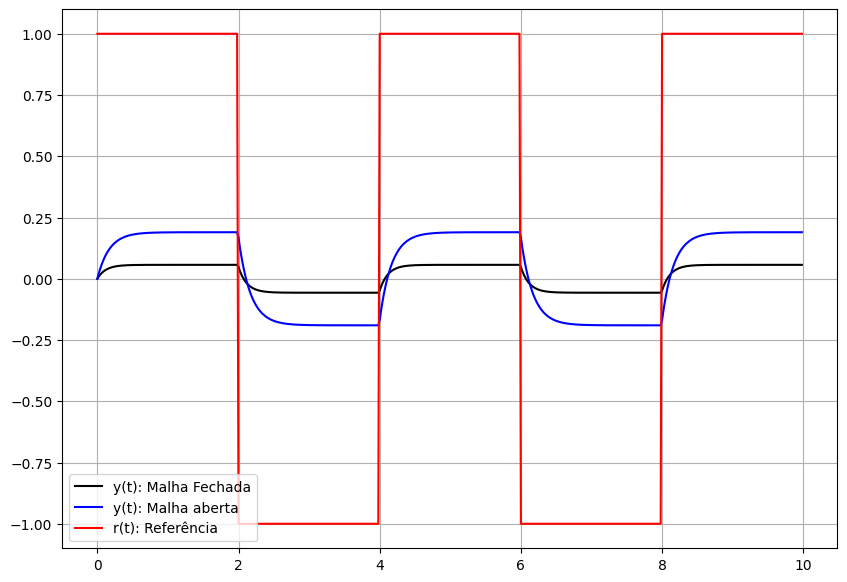

In [ ]:
import control as ct
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import square

## ________Define o sinal de entrada e sinal de referência __________##
N = 500
Amplutude = 1
freq = 0.25
Fs = 50
Ts =1/Fs

n = np.arange(0,N)
tempo = n*Ts

sinal_de_entrada = Amplutude*square(2*np.pi*freq*n*Ts)


sinal_de_referencia = 0.19*Amplutude*square(2*np.pi*freq*n*Ts)


## ________Sistema em Malha Aberta __________##

Km = 0.19
tau = 0.168

NUM = [Km]
DEN = [tau, 1]

G = ct.tf(NUM,DEN)

_, y_malha_aberta = ct.forced_response(G, T = tempo, U = sinal_de_entrada) 


print("Sistema em Malha Aberta:\n", G)

## ________Controlador Propocional __________##

Kp = 2.25

Gc = Kp

## ________Sistema em Malha Fechada __________##

H = ct.feedback(Gc*G, 1, sign = -1)
print("Sistema em Malha Fechada:\n", H)

## ________Simulação do Sistema em Malha Fechada para Onda Quadrada __________##

_, y_malha_fechada = ct.forced_response(H, T = tempo, U = sinal_de_referencia) 

## ________Simulação do Sistema em Malha Fechada para Onda Quadrada __________##

plt.figure(figsize=(10,7))
plt.plot(tempo, y_malha_fechada, '-k', label = "y(t): Malha Fechada")
plt.plot(tempo, y_malha_aberta, '-b', label ="y(t): Malha aberta")
plt.plot(tempo, sinal_de_entrada, '-r', label ="r(t): Referência")
plt.legend()
plt.grid()
plt.show()



# **Exercício de Fixação**

Analise a resposta do sistema em malha fechada com o controlador proporcionale responda:

1. A resposta do sistema em malha fechada é mais rápida do que a resposta em malha aberta?  Explique. 
2. A medida que o ganho $K_p$ assume valores elevados, o polo de malha fechada se afasta do eixo imaginário, no plano complexo. Verdadeiro ou Falso? Explique.
3. O erro em regime permanente está elevado. Sem substituir o tipo de controlador, o que poderia ser alterado (e como) a  fim de reduzir o erro em regime permanente?  Explique quais conseguências são esperadas com essa medida.


# **Sinal de Controle**

Em simulação, pode-se admitir valores elevados para o ganho do controlador, com a finalidade de reduzir o erro em regime permanente. No entanto, quanto maior o valor de $K_p$, maior será a magnitude do sinal de controle. 

Deve-se lembrar que a bancada é alimentada por uma fonte de tensão finita. Logo a magnitude do sinal de controle não deve ser superior a tensão de alimentação da bancada Motor-Gerador.

Para simular o sistema em MF e obter na saída o sinal de controle, deve-se criar um sistema com essa finalidade.

A função *feedback (sys1, sys2, sign = -1)* admite:

1.  O *sys1* função de transferencia de Malha Direta; 
2.  O *sys2* função de transferencia de Realimentação; 
3.  O *sign* sinal da realimentação, para controle deve ser *sign = -1*.


Sendo assim, faz-se: 

1. *sys1* igual a $G_c (s)$
2. *sys2* igual a $G(s)$



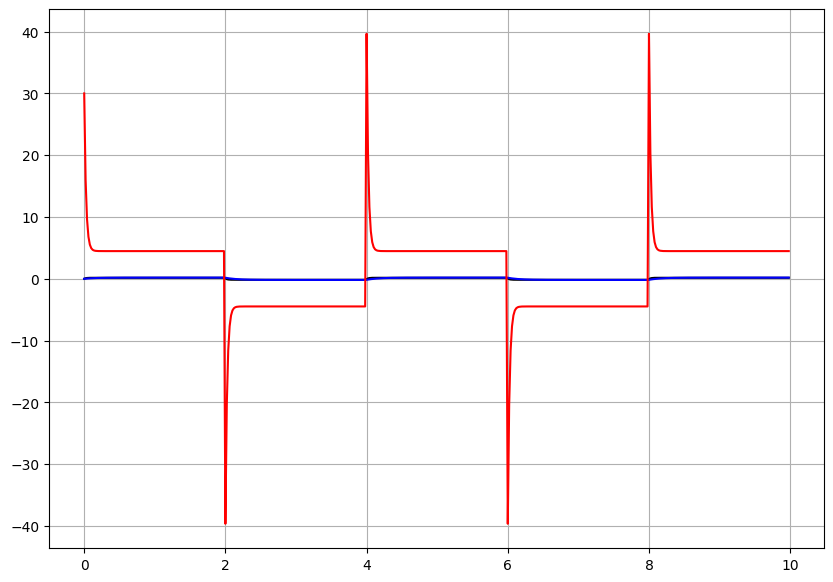

In [ ]:
## ________Sistema para Obter Sinal de Controle __________##

C = ct.feedback(Gc, G, sign =-1)

## ________Simulação para obter o Sinal de Controle __________##

_, sinal_controle = ct.forced_response(C, T = tempo, U = sinal_de_entrada)

## ________Simulação do Sistema em Malha Fechada para Onda Quadrada __________##

plt.figure(figsize=(10,7))
plt.plot(tempo, y_malha_fechada, '-k')
plt.plot(tempo, y_malha_aberta, '-b')
plt.plot(tempo, sinal_controle, '-r', label= "Sinal de Controle")
plt.grid()
plt.show()



# **Lugar Geométrico das Raízes - LGR**

Considere $G(s)$ a função de transferência de malha direta em cascata com o controlador $K$, com realimentação unitária e negativa. Em malha fechada, tem-se:

$$ H(s) = \frac{K G(s)}{1+ K G(s)}$$

O LGR corresponde a todos os pontos no plano complexo que as raízes do polinômio do denominador de $H(s)$ pode assumir quando o ganho $K$ varia de zero a infinito. Sendo assim, tem-se:

$$ 1 + K G(s) = 0. \tag{A}$$

Para valores de $K$ positivos, a equação (A) impõe duas restrições sobre o LGR, são elas:

1. $\angle{G(s)} = (2\ell +1)180^{0}$, para $\ell = 0, \pm 1, \pm 2, ...$ 

2. O ganho $K = \frac{1}{| G(s) |}$ 



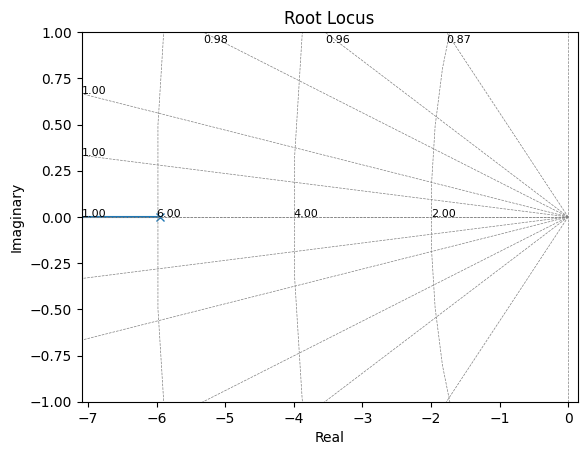

In [ ]:
ct.root_locus(G, plot=True);


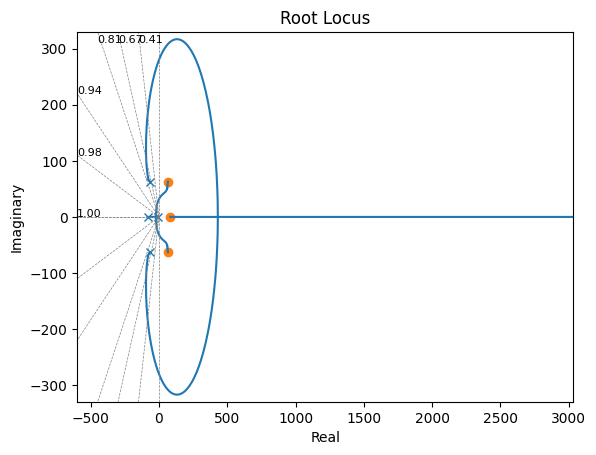

In [ ]:
ct.root_locus(G_pade*G, plot=True);

Sistema MF: 
 
     3.8
-------------
0.168 s + 4.8



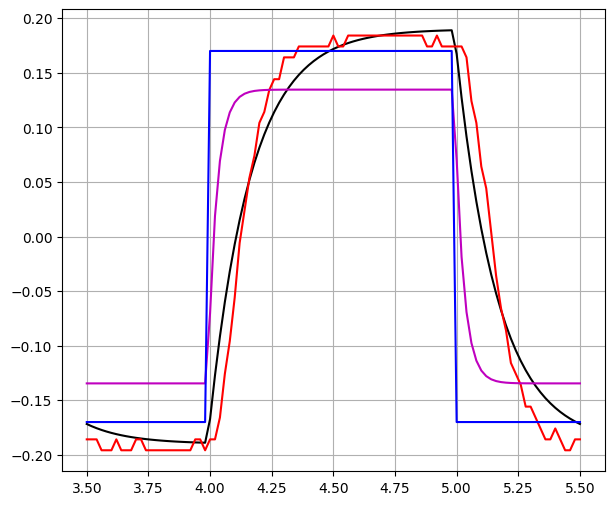

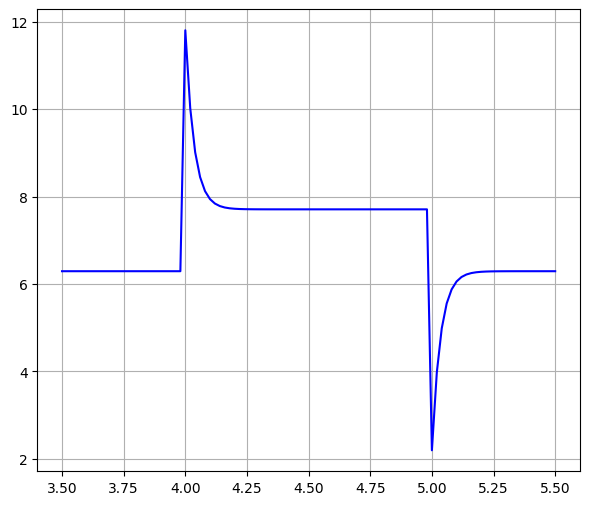

In [ ]:
# ct.root_locus(G);
Kp = 20
# Kp = 5.26
# Kp = 2.25
# Sistema MF
H = ct.feedback(Kp*G,1,sign=-1)

print('Sistema MF: \n', H)

# Sistema para o Controlador
C = ct.feedback(Kp,G,sign=-1)

_,ymf = ct.forced_response(H,T = tempo, U = 0.17*sinal_de_entrada)
_,u = ct.forced_response(C,T = tempo, U = 0.17*sinal_de_entrada)

plt.figure(figsize=(7,6))
plt.plot(tempo[index],ym[index],'k', tempo[index],sinal_de_saida[index],'r',label = "A")
plt.plot(tempo[index],ymf[index],'m')
plt.plot(tempo[index],0.17*sinal_de_entrada[index],'b')
plt.grid()
plt.show()

plt.figure(figsize=(7,6))
plt.plot(tempo[index],u[index]+7,'b')
plt.grid()
plt.show()

# **Projeto do Controlador PI**

Função de Transferência de malha aberta:

$$ G(s) = \frac{K_m}{\tau s + 1} = \frac{K  b}{s + b} \tag{A}$$


Em que, 
$K = K_m$ e 
$b = \frac{1}{\tau}$

Função de Transferência de Controlador PI:

$$ G_c (s) = \frac{K_c (s + a)}{s} \tag{B}$$


Em malha fechada:

$$ H(s) = \frac{G_c(s) G(s)}{1 + G_c(s) G(s)} $$

Com o controlador PI na malha, o tipo do sistema passa a ser Tipo 1 (erro em regime permanente nulo para entrada degrau). 


$$ \frac{\omega_n^2}{s^2 + 2 \zeta \omega_n s + \omega_n^2 } $$




Ganho do Controlador PI: 
 7.239578947368423 
 Zero do PI: 
 -12.213562870768872


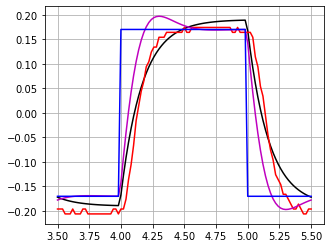

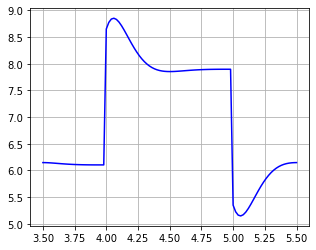

In [ ]:
# Fator de Amortecimento
qsi = 0.707
# Freq Natural
wn = 10

b = 1/0.168
K = 0.19

Kc = (((2*qsi*wn)/b)-1)/K
a = - (wn**2)/(Kc*K*b)

print('Ganho do Controlador PI: \n', Kc, '\n Zero do PI: \n', a)

# K = 3.57
# a = -24

Gc = ct.tf([Kc*1,-Kc*a],[1,0])

H_pi = ct.feedback(Gc*G, 1, sign = -1)

C_pi = ct.feedback(Gc, G, sign = -1)

_,ymf_pi = ct.forced_response(H_pi,T = tempo, U = 0.17*r)
_,u_pi = ct.forced_response(C_pi,T = tempo, U = 0.17*r)

plt.figure(figsize=(5,4))
plt.plot(tempo[index],ym[index],'k',tempo[index],y[index],'r')
plt.plot(tempo[index],ymf_pi[index],'m')
plt.plot(tempo[index],0.17*r[index],'b')
plt.grid()
plt.show()

plt.figure(figsize=(5,4))
plt.plot(tempo[index],u_pi[index]+7,'b')
plt.grid()
plt.show()

Polos de MF: 
 [-7.07+7.07213546j -7.07-7.07213546j]


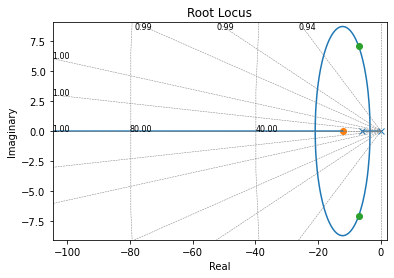

Freq Natural: 
 [10. 10.]
Fator de Amortecimento: 
 [0.707 0.707]


In [ ]:
ct.rlocus(Gc*G, plot=True, grid = True);
print('Polos de MF: \n', H_pi.pole() )
plt.plot(np.real(H_pi.pole()),np.imag(H_pi.pole()),'o')
plt.show()
print('Freq Natural: \n', np.abs(H_pi.pole()))
print('Fator de Amortecimento: \n', np.cos(np.pi - np.angle(H_pi.pole())))

In [ ]:
Gz = ct.c2d(Gc,Ts, 'tustin')

print('Função de Transferência: \n', Gz)

Função de Transferência: 
 
8.473 z - 6.006
---------------
     z - 1

dt = 0.027902403831481886



$$\frac{U(z)}{E(z)} = \frac{b_0 z + b_1}{z - 1} \frac{z^{-1}}{z^{-1}} $$


Equação de Diferenças:

$$ u(k) = u(k-1) + b_0 e(k) + b_1 e(k-1)$$ 



$$ $$